#8.1 Engine lifetime with RNNs

In this exercise, you will develop a Recurrent Neural Network capable of estimating the lifetime of engines. Your final submission should include a link to your google collab notebook, and a pdf adressing the questions asked in the task.

The paper that can help you with the exercises can be found here:\
Wang, Y., Zhao, Y. & Addepalli, S. Practical Options for Adopting Recurrent Neural Network and Its Variants on Remaining Useful Life Prediction. Chin. J. Mech. Eng. 34, 69 (2021). https://doi.org/10.1186/s10033-021-00588-x

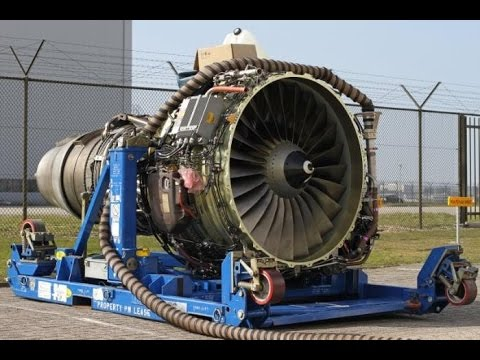



Y. Dwivedi, Predicting Engine Failure using C-MAPSS data, 2018 (https://yajasd.github.io/2018/06/04/Predicting-Engine-Failure/)

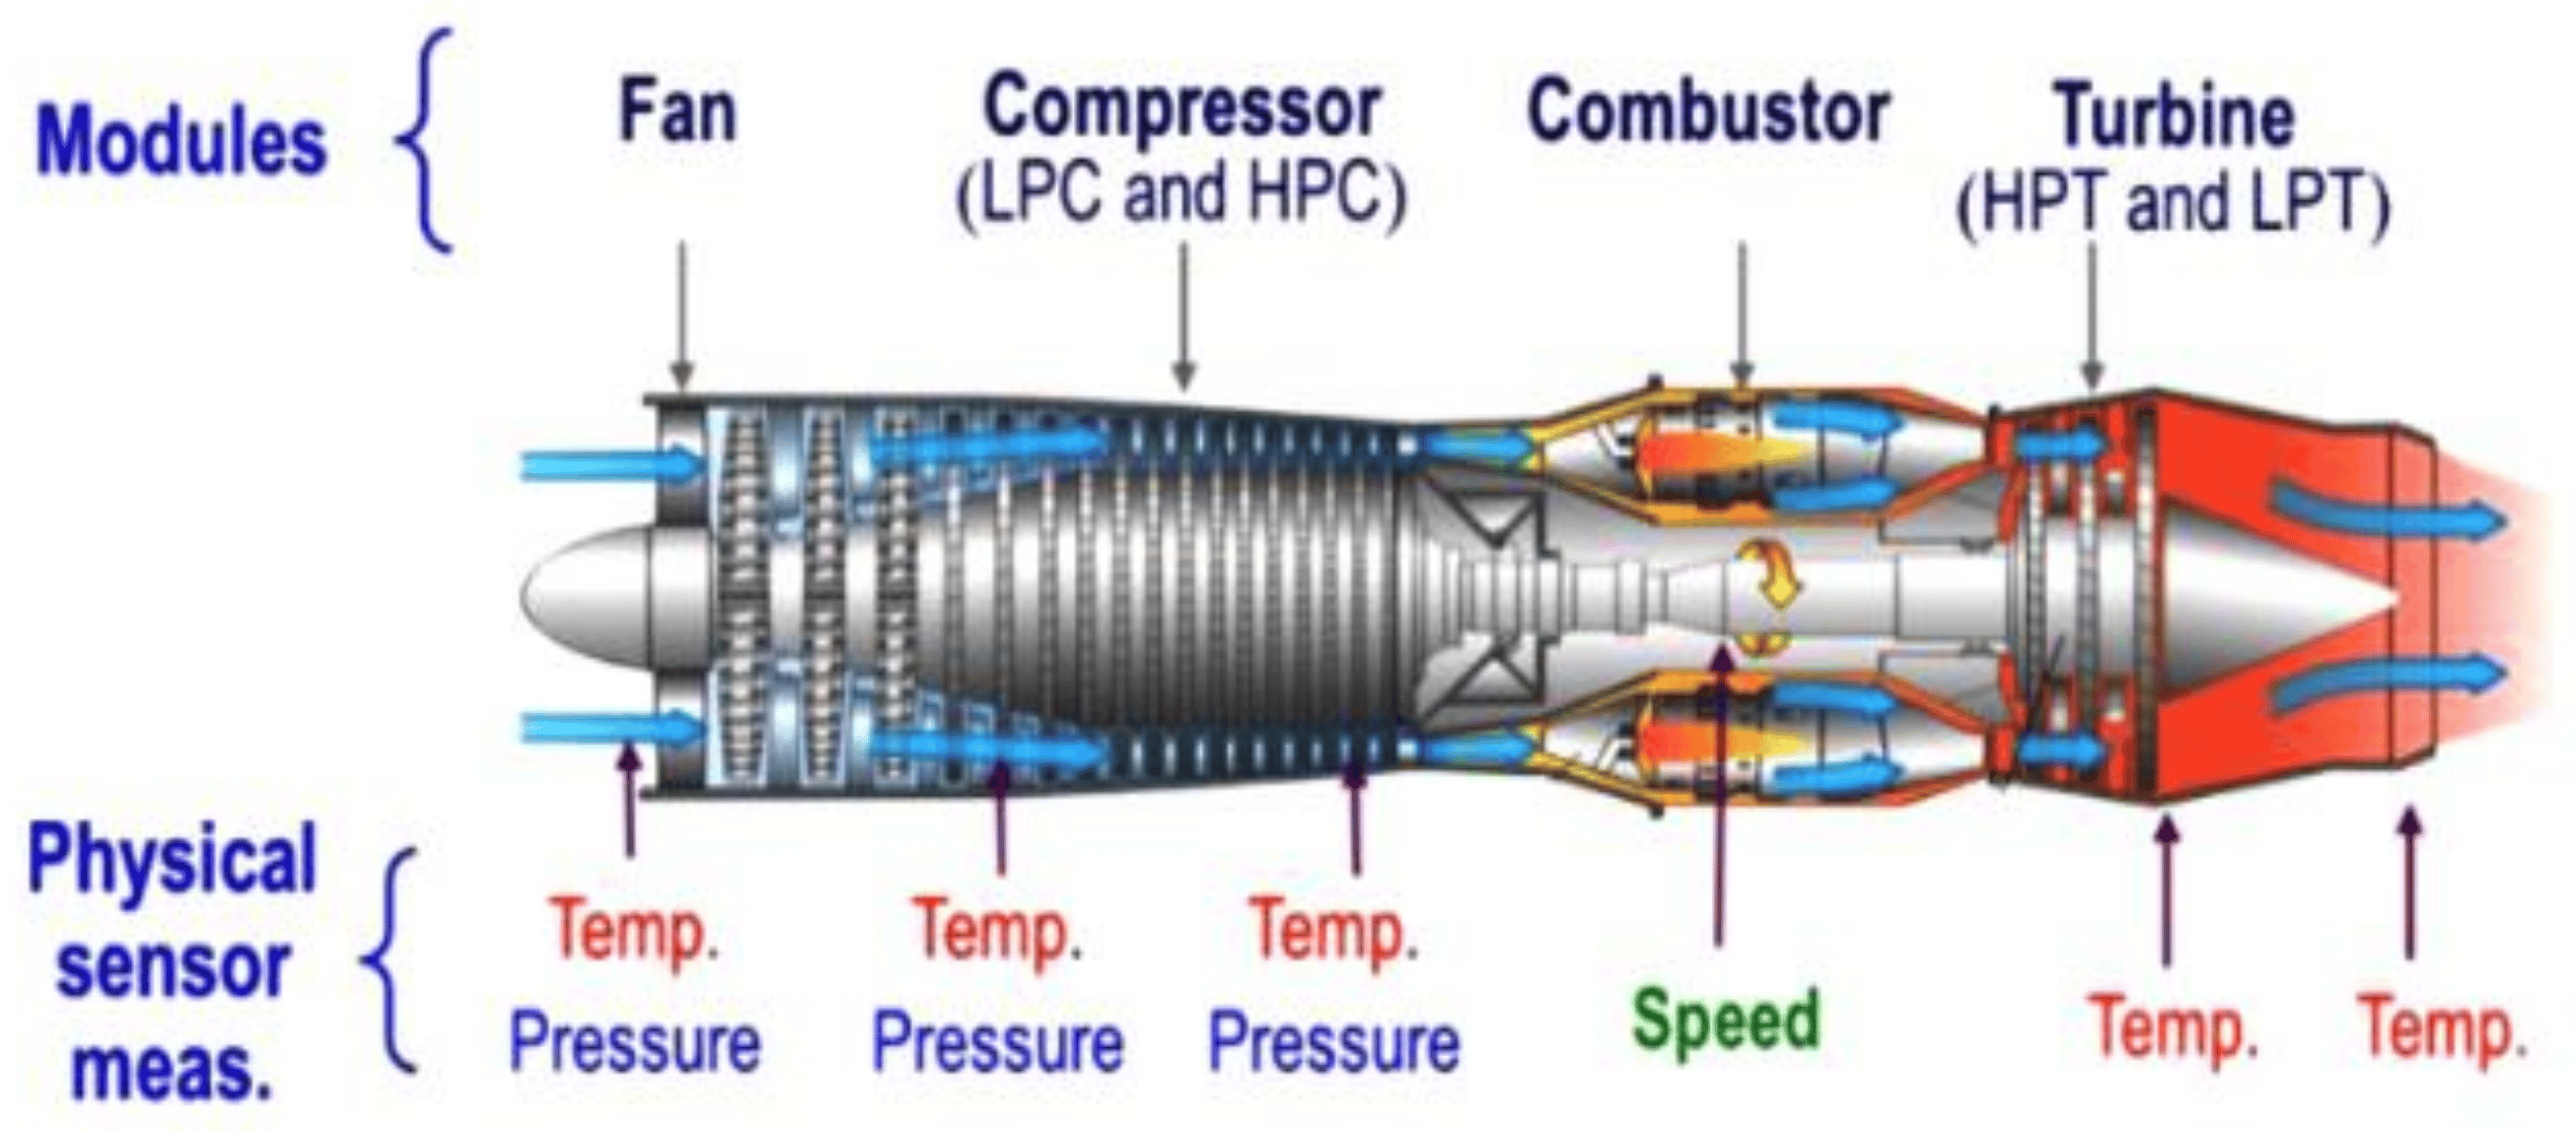


Muneer, A.; Taib, S.M.; Naseer, S.; Ali, R.F.; Aziz, I.A. Data-Driven Deep Learning-Based Attention Mechanism for Remaining Useful Life Prediction: Case Study Application to Turbofan Engine Analysis. Electronics 2021, 10, 2453. https://doi.org/10.3390/electronics10202453

##Experimental Scenario

The goal of this exercise is to develop a model that can predict the remaining lifetime of airplane engines using a recurrent neural network. This exercise shows deep learning apllied to an engineering focused problem where especially the preprocessing of the data is important.

The data consists of multivariate time series of sensor reading and settings from 100 airplane engines, here called *units*. The engines operate normally at the start of each time series, and have been run until they failed. The data is provided in a text file with 26 columns of numbers, separated by spaces. Each column is a different variable and each row represents the setting and sensor values for a given time/cycle, and can hence be seen as a multivariate time series. The columns correspond to:

1\.	unit number\
2\.	time, in cycles\
3\.	operational setting 1\
4\.	operational setting 2\
5\.	operational setting 3\
6\.	sensor measurement  1\
7\.	sensor measurement  2\
... \
26\.	sensor measurement  21

The goal of the exercise is to use an RNN to predict the remaining lifetime of an engine for a certain point in time based on the n_past previous datapoints. The RUL is not given directly in the data files, so we have to calculate it for every time series in the code below. The problem is illustrated in the following figure (showing only one feature):



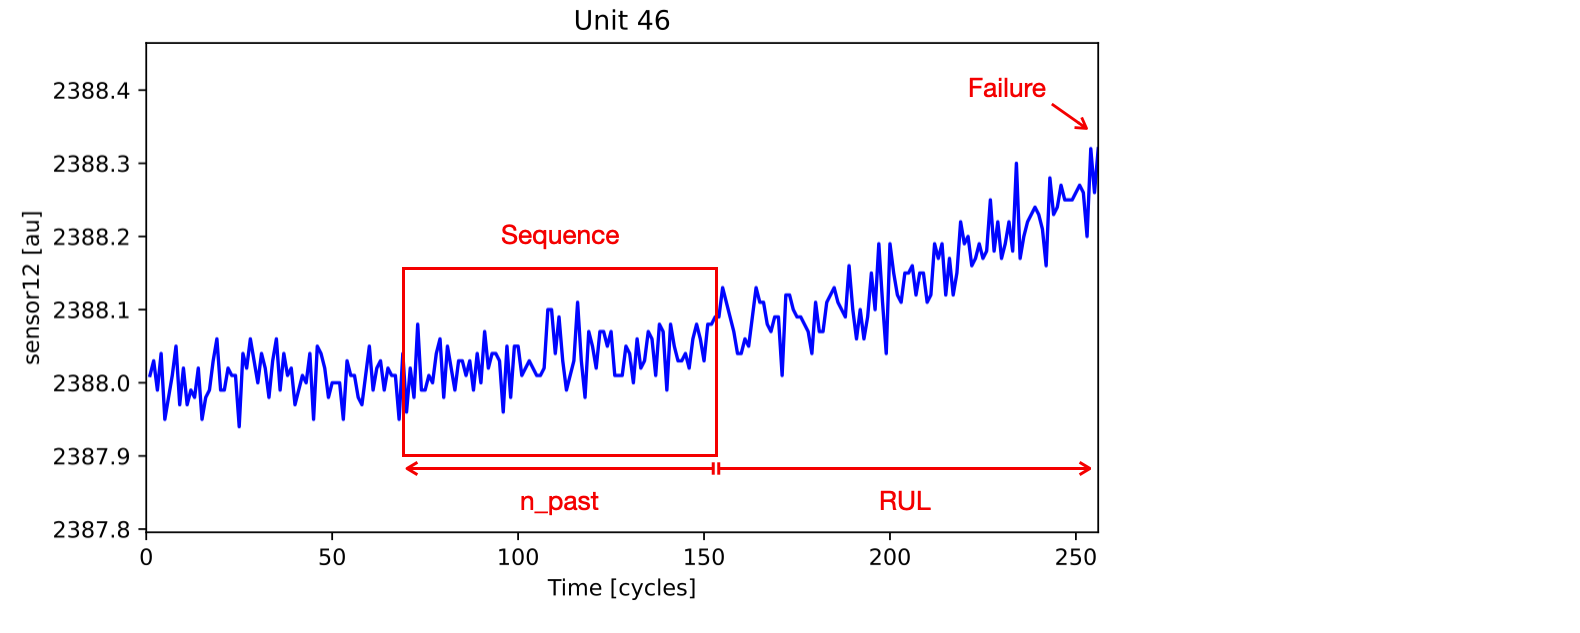

## Tasks


1.   Get familiar with the training data by plotting it for all units and a single unit both before and after normalization.

2.   Run the cell that creates the training data (multivariate time series of length n_past) and calculates the labels (RUL). Describe how the dataprocessing works and plot the RUL for all time steps for all units.

3.   Implement and train a recurrent neural network that predicts the RUL for a multivariate time series of length n_past.

4.   Evaluate the trained model on the training and validation datasets [using MSE and MAE]. What does the final loss mean? Make several plots to evaluate the model, e.g., true vs. prediction, histograms of residuals.

5.   Load and process the test data, which we find in a different file. Evaluate the performance of the model on the processed test data.

6. (optional) If you want to be 95% sure that the engine still has at least 20 cycles to go, at what network output should you recommend maintenance? (The histogram with the residuals can help you with your estimate.)



In [ ]:
# You don't have to touch this
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

layers = keras.layers
models = keras.models

print(keras.__version__)

## Download the Data

In [ ]:
# Download the data set
# You don't have to touch this
if os.path.exists("CMAPSSData.zip") == False:
    !wget https://data.nasa.gov/docs/legacy/CMAPSSData.zip
    !unzip CMAPSSData.zip

## Load the data

In [ ]:
# We load the training data (without labels) as a pandas DataFrame. You can read
# the documentation here: https://pandas.pydata.org/docs/reference/frame.html
# You don't have to touch this
data_train = pd.read_csv('train_FD001.txt', delimiter=' ', header=None, usecols=range(26))

name_list = ['unit', 'time', 'setting0', 'setting1', 'setting2']

number_of_sensors = 21
for i in range(number_of_sensors):
  name_list.append('sensor'+str(i))

data_train.columns = name_list

## Plot the data for all units

In [ ]:
# Plot the input data for all units
#...


## Plot the data for a single unit

In [ ]:
# Plot the input data for a single unit
#...



## Drop irrelevant columns and normalize the training data

In [ ]:
# Choose which columns of data you want to keep and which you want to drop.
# Training with everything works but might not be the best choice.
# Hint 1: Keep "unit" and "time" for now
# Hint 2: Remember to update name_list and n_columns
#...
#data_train = data_train.drop(['xxx'], axis=1)

name_list = data_train.columns
n_columns = len(data_train.columns)

In [ ]:
# Normalization the training data
# Hint: It is a good idea to keep the data as a DataFrame, as the later code will
# assume this format.

data_train_scaled = data_train.copy()

#...

## Plot the normalized training data for all units

In [ ]:
# Plot the normalized input data for all units and a single unit
#...

## Prepare the training data and labels

In [ ]:
# Create multivariate time series with length n_past and calculate the RUL for
# each training dataset.
# You don't have to touch this

trainX_all = []
trainY_all = []

n_past = 30

# Loop over units:
for i_unit in np.arange(1,101):

  data_unit = data_train_scaled[data_train["unit"]==i_unit]

  max_time_unit = np.max(data_unit["time"])

  # Loop over times (cycles). We start at i_time=n_past because the window is n_past long:
  for i_time in np.arange(n_past, max_time_unit):
    X = data_unit.iloc[i_time-n_past:i_time][name_list[2:]]
    Y = max_time_unit - data_unit.iloc[i_time]["time"]

    trainX_all.append(X)
    trainY_all.append(Y)

  print(i_unit, end=" ")

trainX_all = np.array(trainX_all)
trainY_all = np.array(trainY_all)

Describe the loop above:

...

In [ ]:
# Plot the labels of the training data set
#...

## Split the data into training and validation

In [ ]:
# Split the data into a training and validation dataset (we will load a seperate test dataset later)
# Hint: Consider shuffling the data

#X_train, y_train, y_train, y_valid = ...

## Define the RNN

In [ ]:
# Define the LSTM architecture

last_layer =

model = models.Sequential()
#...

model.add(layers.Dense(last_layer))

model.compile(optimizer=, loss=)
model.summary()

## Train the RNN

In [ ]:
# Define callbacks to save the best model during the training

# Options for EarlyStopping, ReduceLROnPlateau and ModelCheckpoint
#keras.callbacks.ReduceLROnPlateau(factor=, patience=, verbose=, min_lr=),
#keras.callbacks.EarlyStopping(patience=, verbose=)
#keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor=, mode=)


results = model.fit( , ,
    epochs=,
    batch_size=,
    verbose=,
    validation_data=( , ),
    callbacks=[])

## Plot the results and Evaluate the performance

In [ ]:
# Plotting training loss and validation loss

In [ ]:
# Predict on the training dataset

# You can load the best model of your callback option via
#model.load_weights("best_model.keras")

In [ ]:
# Plot the true RUL and the network prediction for the training data

## Evaluate on the test data:

We load the test data and labels from two different files, `test_FD001.txt` and `RUL_FD001.txt`, which contain data for 100 engines (different from the training data). The test data is formatted sligthly differently from the training data. Instead of gettting full sequences from start of an engines life to its failure, we get shorter sequences of varying length for the 100 engines. The file `RUL_FD001.txt` then contains the time from the end of the sequence to the engine's failure, i.e., the RUL. In the code below we create 100 test datasets by cutting the test squences to the n_past last datapoints.

You should drop the same coloumns as with the training data and implement the same normalization.

In [ ]:
# Load test data set and labels
data_test = pd.read_csv('test_FD001.txt', delimiter=' ', header=None, usecols=range(26))
labels_test = pd.read_csv('RUL_FD001.txt', delimiter=' ', header=None, usecols=[0])

name_list = ['unit', 'time', 'setting0', 'setting1', 'setting2']

number_of_sensors = 21
for i in range(number_of_sensors):
  name_list.append('sensor'+str(i))

data_test.columns = name_list

labels_test.columns = ['RUL']


# Drop the unneccesary columns
#data_test = data_test.drop(['xxx'], axis=1)
#...


# Normalization of the training data with the same scaling as the training data
data_test_scaled = data_test.copy()
#...




# Create multivariate time series with length n_past for each test engine
# You don't have to touch this

testX = []
testY = []

# Loop over units:
for i_unit in np.arange(1,101):

  data_unit = data_test_scaled[data_test_scaled["unit"]==i_unit]

  X = data_unit.iloc[-n_past:][name_list[2:]]
  Y = labels_test.iloc[i_unit-1]["RUL"]

  testX.append(X)
  testY.append(Y)

  print(i_unit, end=" ")

testX = np.array(testX)
testY = np.array(testY)

In [ ]:
# Predict on the test datasets

In [ ]:
# Plot the prediction and the true values for each test unit
# Hint: Depending on how you plot it, it may be easier to compare the true
# values and the predicted values if you order them in a smart way.

In [ ]:
# Calculate the MSE and MAE of the training, validation and test predictions

## (optional) Recommend Maintenance

In [ ]:
# Plot the residuals in a histogram and determine the standard diviation

In [ ]:
# Answer to question 6:

output_for_maint =
print('The engine should be recomended for maintainance with an output below: ', )